# Segmentation Based on Consumer

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_classification


In [52]:
df2 = pd.read_csv('/Users/rajdipingale/Downloads/Electric_Vehicle_Data.csv')
df2.head()

,Unnamed: 0,Age,City,Profession,Marital Status,Education,No. of Family members,Annual Income,Would you prefer replacing all your vehicles to Electronic vehicles?,If Yes/Maybe what type of EV would you prefer?,Do you think Electronic Vehicles are economical?,Which brand of vehicle do you currently own?,How much money could you spend on an Electronic vehicle?,Preference for wheels in EV,Do you think Electronic vehicles will replace fuel cars in India?
0,0,30,Nabha,NaN,Single,Graduate,5,1.193876e+06,Maybe,SUV,Yes,Hyundai,<5 lakhs,2,I don't think so
1,1,27,Pune,NaN,Single,Graduate,4,1.844540e+06,Yes,SUV,Yes,Honda,<15 lakhs,4,"Yes, in <20years"
2,2,32,Kashipur,NaN,Single,Graduate,4,2.948150e+06,Yes,Hatchback,Yes,KIA,<15 lakhs,4,"Yes, in <20years"
3,3,55,Pune,Business,Single,Graduate,3,2.832380e+06,Maybe,Hatchback,No,Hyundai,<5 lakhs,4,"Yes, in <10 years"
4,4,26,Satara,NaN,Single,Graduate,4,2.638751e+06,Yes,Sedan,Yes,McLaren,<15 lakhs,4,"Yes, in <20years"


In [53]:
df2.rename(columns={'No. of Family members': 'Family_Members'}, inplace=True)
df2.rename(columns={'Annual Income': 'Income'}, inplace=True)
df2.rename(columns={'Would you prefer replacing all your vehicles to Electronic vehicles?': 'Standard_To_EV'}, inplace=True)
df2.rename(columns={'If Yes/Maybe what type of  EV would you prefer?': 'Type'}, inplace=True)
df2.rename(columns={'Do you think Electronic Vehicles are economical?': 'Economical'}, inplace=True)
df2.rename(columns={'Which brand of vehicle do you currently own?': 'Current_Brand'}, inplace=True)
df2.rename(columns={'How much money could you spend on an Electronic vehicle?': 'Budget'}, inplace=True)
df2.rename(columns={'Preference for wheels in EV': 'Wheels'}, inplace=True)
df2.rename(columns={'Do you think Electronic vehicles will replace fuel cars in India?': 'Evolution_Of_EV'}, inplace=True)

In [54]:
df2.head()

,Unnamed: 0,Age,City,Profession,Marital Status,Education,Family_Members,Income,Standard_To_EV,Type,Economical,Current_Brand,Budget,Wheels,Evolution_Of_EV
0,0,30,Nabha,NaN,Single,Graduate,5,1.193876e+06,Maybe,SUV,Yes,Hyundai,<5 lakhs,2,I don't think so
1,1,27,Pune,NaN,Single,Graduate,4,1.844540e+06,Yes,SUV,Yes,Honda,<15 lakhs,4,"Yes, in <20years"
2,2,32,Kashipur,NaN,Single,Graduate,4,2.948150e+06,Yes,Hatchback,Yes,KIA,<15 lakhs,4,"Yes, in <20years"
3,3,55,Pune,Business,Single,Graduate,3,2.832380e+06,Maybe,Hatchback,No,Hyundai,<5 lakhs,4,"Yes, in <10 years"
4,4,26,Satara,NaN,Single,Graduate,4,2.638751e+06,Yes,Sedan,Yes,McLaren,<15 lakhs,4,"Yes, in <20years"


In [55]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   City             1000 non-null   object 
 3   Profession       540 non-null    object 
 4   Marital Status   1000 non-null   object 
 5   Education        1000 non-null   object 
 6   Family_Members   1000 non-null   int64  
 7   Income           1000 non-null   float64
 8   Standard_To_EV   1000 non-null   object 
 9   Type             1000 non-null   object 
 10  Economical       1000 non-null   object 
 11  Current_Brand    1000 non-null   object 
 12  Budget           1000 non-null   object 
 13  Wheels           1000 non-null   int64  
 14  Evolution_Of_EV  1000 non-null   object 
dtypes: float64(1), int64(4), object(10)
memory usage: 117.3+ KB


In [56]:
df2['Profession'].value_counts()

Profession
Working Professional    336
Business                167
Salaried                 37
Name: count, dtype: int64

In [57]:
df2['Profession'] = df2['Profession'].fillna('Self Employed')

In [8]:
df2.sample(20)

,Unnamed: 0,Age,City,Profession,Marital Status,Education,Family_Members,Income,Standard_To_EV,Type,Economical,Current_Brand,Budget,Wheels,Evolution_Of_EV
925,925,24,Banglore,Business,Single,Graduate,4,3.065340e+06,Yes,Sedan,Maybe,Hyundai,<15 lakhs,4,"Yes, in <20years"
590,590,28,Pune,Salaried,Single,Graduate,4,1.365078e+06,Yes,SUV,Yes,Audi,<15 lakhs,2,"Yes, in <20years"
248,248,24,pune,Business,Single,Graduate,7,2.701691e+06,Yes,Sedan,No,KIA,<5 lakhs,3,"Yes, in <10 years"
942,942,30,Pune,Self Employed,Married,Post Graduate,0,2.699569e+06,Yes,SUV,Maybe,Nissan,<5 lakhs,4,"Yes, in <20years"
837,837,28,Pune,Business,Married,Post Graduate,2,2.110099e+06,Maybe,Hatchback,Yes,Honda,<15 lakhs,4,"Yes, in <10 years"
6,6,23,Pune,Working Professional,Married,Graduate,3,2.686745e+06,Yes,Sedan,Yes,KIA,<15 lakhs,2,"Yes, in <10 years"
604,604,21,Pune,Self Employed,Married,Graduate,4,1.728849e+06,Yes,SUV,Maybe,Honda,<5 lakhs,4,"Yes, in <20years"
401,401,28,New Delhi,Self Employed,Single,Post Graduate,4,2.806237e+06,Yes,SUV,Maybe,Nissan,<15 lakhs,4,"Yes, in <20years"
618,618,29,Pune,Working Professional,Married,Post Graduate,4,2.842434e+06,Yes,Hatchback,Yes,KIA,<15 lakhs,2,I don't think so
961,961,47,Pune,Self Employed,Single,Post Graduate,5,2.269370e+06,Yes,Liftback,Yes,Tata,<5 lakhs,4,"Yes, in <10 years"


<Axes: xlabel='count', ylabel='Profession'>

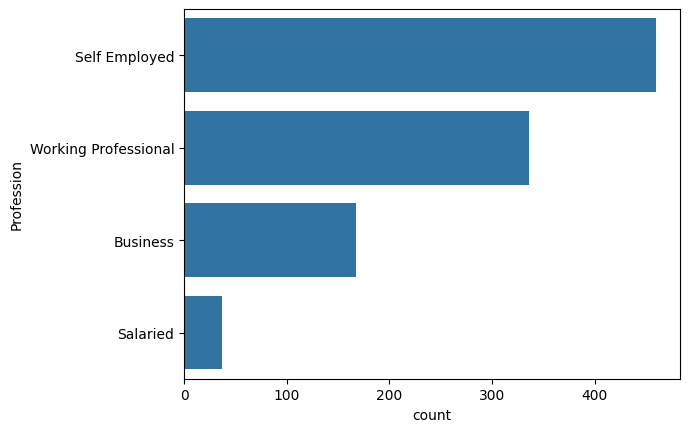

In [9]:
sns.countplot(y=df2['Profession'], order=df2['Profession'].value_counts().index)

<Axes: xlabel='count', ylabel='City'>

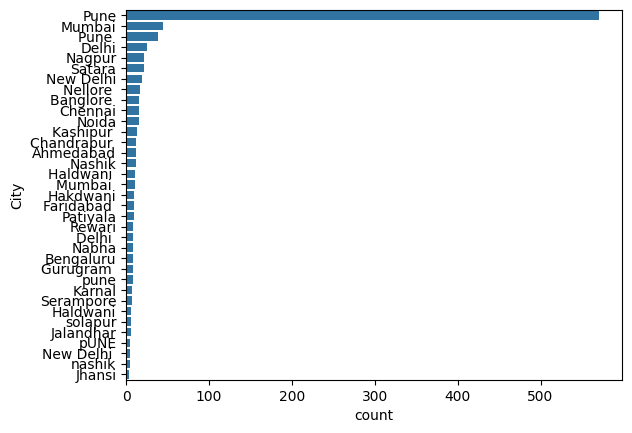

In [10]:
sns.countplot(y=df2['City'], order=df2['City'].value_counts().index)

<Axes: xlabel='count', ylabel='Type'>

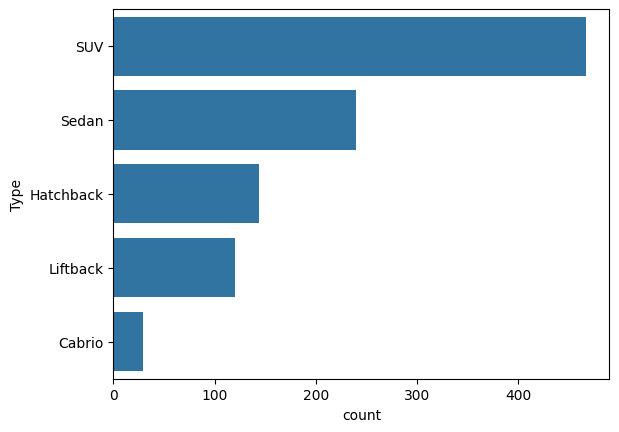

In [11]:
sns.countplot(y=df2['Type'], order=df2['Type'].value_counts().index)

<Axes: xlabel='Income', ylabel='Profession'>

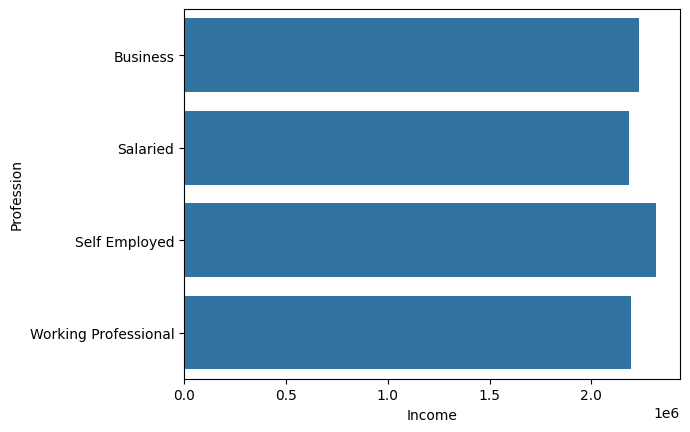

In [12]:
average_prices = df2.groupby('Profession')['Income'].mean().reset_index()
sns.barplot(x='Income', y='Profession', data=average_prices, orient='h')

<Axes: xlabel='count', ylabel='Budget'>

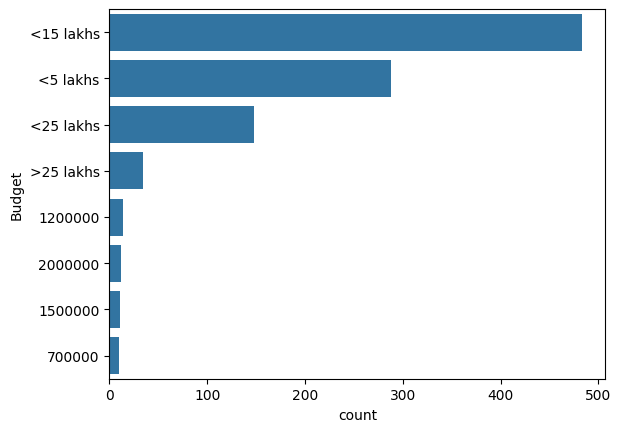

In [13]:
sns.countplot(y=df2['Budget'], order=df2['Budget'].value_counts().index)

<Axes: xlabel='Wheels', ylabel='count'>

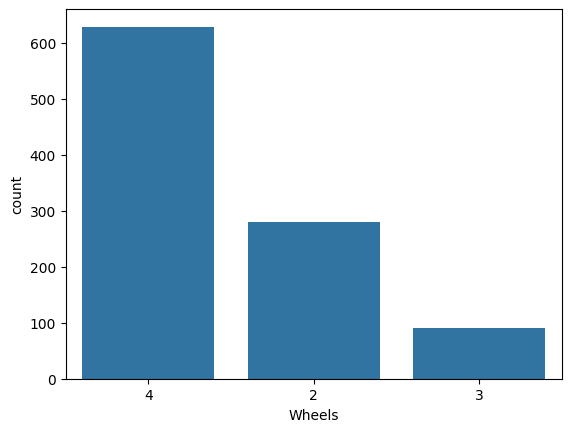

In [14]:
sns.countplot(x=df2['Wheels'], order=df2['Wheels'].value_counts().index)

<Axes: xlabel='count', ylabel='Evolution_Of_EV'>

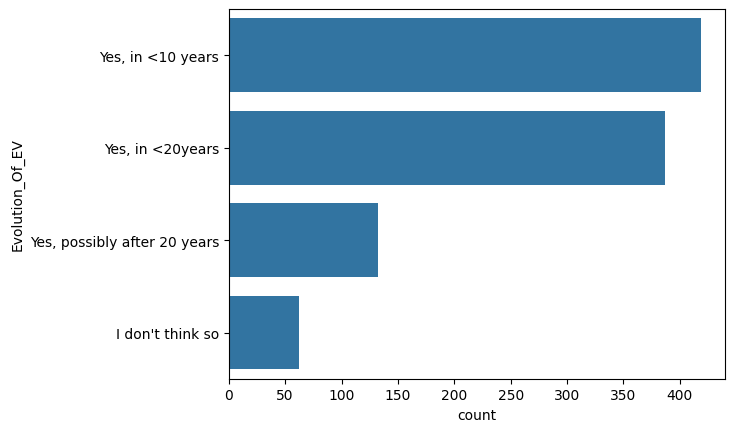

In [15]:
sns.countplot(y=df2['Evolution_Of_EV'], order=df2['Evolution_Of_EV'].value_counts().index)

<Axes: xlabel='Economical', ylabel='count'>

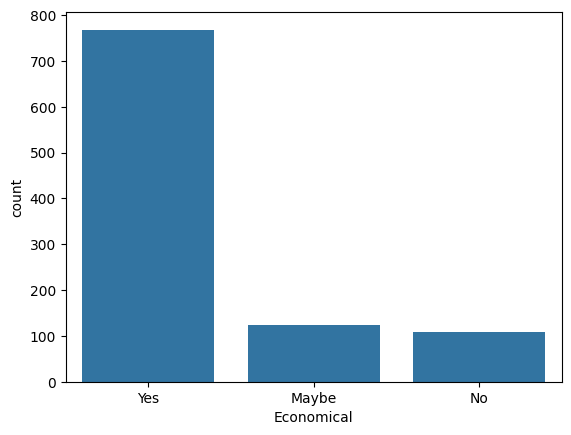

In [16]:
sns.countplot(x=df2['Economical'], order=df2['Economical'].value_counts().index)

<Axes: xlabel='count', ylabel='Current_Brand'>

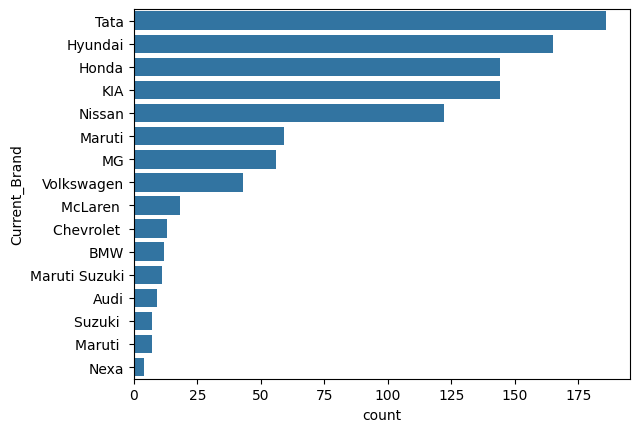

In [17]:
sns.countplot(y=df2['Current_Brand'], order=df2['Current_Brand'].value_counts().index)

In [18]:
df2['Marital Status'].unique()

array(['Single', 'Married'], dtype=object)

In [19]:
df2['Education'].unique()

array(['Graduate', 'Post Graduate'], dtype=object)

## Transformation of variables

In [58]:
df2['Marital Status'].replace(to_replace=['Single','Married'],value=[0, 1],inplace=True)
df2['Economical'].replace(to_replace=['No', 'Maybe', 'Yes'],value=[0, 0, 1],inplace=True)
df2['Post_Graduate'] = df2['Education'].apply(lambda x:1 if 'Post Graduate' in x else 0)
df2['Standard_to_EV'] = df2['Standard_To_EV'].apply(lambda x:1 if 'Yes' in x else 0)
df2['Standard_to_EV'] = df2['Standard_To_EV'].apply(lambda x:1 if 'Yes' in x else 0)
df2['Budget'].replace(to_replace=['<5 lakhs','<15 lakhs', '<25 lakhs', '>25 lakhs'],value=[5, 15, 25, 30],inplace=True)
df2['Evolution_Of_EV'].replace(to_replace=['I don\'t think so','Yes, in <10 years', 'Yes, in <20years', 'Yes, possibly after 20 years'],value=[0, 10, 20, 30],inplace=True)

In [59]:
labelEncoding = LabelEncoder()
df2['City'] = labelEncoding.fit_transform(df2['City'])
df2['Type'] = labelEncoding.fit_transform(df2['Type'])
df2['Current_Brand'] = labelEncoding.fit_transform(df2['Current_Brand'])

In [60]:
df2 = pd.get_dummies(df2, columns = ['Profession'], drop_first=True)

In [61]:
df2['Profession_Salaried'] = df2['Profession_Salaried'].astype('int')
df2['Profession_Self Employed'] = df2['Profession_Self Employed'].astype('int')
df2['Profession_Working Professional'] = df2['Profession_Working Professional'].astype('int')

In [62]:
del df2['Unnamed: 0']
del df2['Education']
del df2['Standard_To_EV']

In [63]:
df2 = df2[df2['Age'] != 118]

In [64]:
df2.head()

,Age,City,Marital Status,Family_Members,Income,Type,Economical,Current_Brand,Budget,Wheels,Evolution_Of_EV,Post_Graduate,Standard_to_EV,Profession_Salaried,Profession_Self Employed,Profession_Working Professional
0,30,18,0,5,1.193876e+06,3,1,4,5,2,0,0,0,0,1,0
1,27,26,0,4,1.844540e+06,3,1,3,15,4,20,0,1,0,1,0
2,32,15,0,4,2.948150e+06,1,1,5,15,4,20,0,1,0,1,0
3,55,26,0,3,2.832380e+06,1,0,4,5,4,10,0,0,0,0,0
4,26,29,0,4,2.638751e+06,4,1,10,15,4,20,0,1,0,1,0


In [65]:
df2['Economical'].value_counts()

Economical
1    767
0    232
Name: count, dtype: int64

In [66]:
df2['Budget'] = df2['Budget'].astype('int')
df2['Income'] = df2['Income'].round(decimals=2)

In [67]:
df2['Budget'].unique()

array([      5,      15,      25,  700000,      30, 2000000, 1200000,
       1500000])

In [68]:
df2['Budget'].replace(to_replace=[700000, 1200000, 1500000, 2000000],value=[7, 12, 15, 20],inplace=True)

In [69]:
df2.shape

(999, 16)

In [71]:
X = df2.values

##  Clustering

### K Means

/Users/rajdipingale/miniforge3/envs/ml_env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/rajdipingale/miniforge3/envs/ml_env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/rajdipingale/miniforge3/envs/ml_env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/rajdipingale/miniforge3/envs/ml_env/lib/python3.8/site-packages/sklearn/cluster/_kme

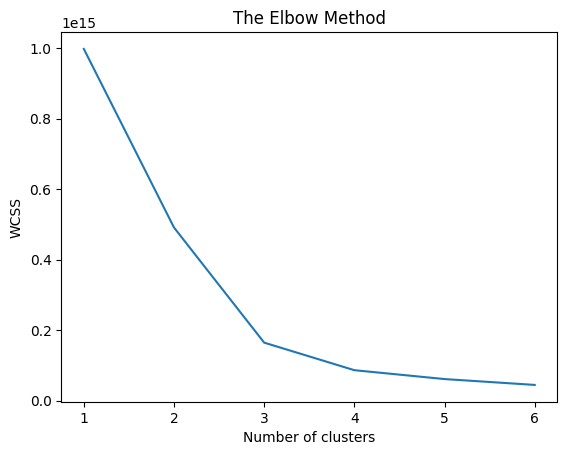

In [33]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 7):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 7), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [34]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

/Users/rajdipingale/miniforge3/envs/ml_env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [35]:
y_kmeans = kmeans.labels_
y_kmeans

array([2, 3, 0, 0, 0, 0, 0, 3, 3, 2, 0, 3, 2, 3, 3, 0, 3, 3, 0, 2, 0, 0,
       0, 3, 2, 3, 3, 3, 3, 3, 2, 0, 3, 0, 3, 3, 0, 3, 0, 2, 3, 2, 3, 3,
       0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 3, 2, 2, 0, 3, 0, 3, 0, 2, 2, 0, 2,
       0, 3, 0, 0, 0, 0, 0, 2, 0, 3, 0, 3, 0, 0, 0, 0, 3, 2, 2, 3, 0, 3,
       2, 3, 3, 0, 3, 0, 0, 3, 2, 3, 3, 0, 0, 3, 2, 2, 0, 0, 3, 3, 3, 2,
       0, 3, 3, 3, 0, 0, 0, 0, 3, 3, 0, 3, 3, 2, 0, 3, 3, 0, 3, 3, 0, 2,
       2, 2, 0, 0, 3, 3, 0, 3, 0, 0, 3, 3, 0, 0, 0, 3, 0, 1, 0, 1, 0, 0,
       2, 0, 0, 3, 0, 3, 0, 0, 0, 0, 2, 0, 0, 3, 0, 3, 3, 0, 2, 0, 3, 3,
       0, 2, 3, 0, 0, 3, 3, 3, 0, 2, 0, 3, 3, 0, 2, 0, 0, 0, 3, 2, 3, 3,
       0, 3, 2, 0, 3, 0, 0, 3, 3, 0, 3, 2, 3, 0, 0, 2, 0, 0, 3, 0, 0, 0,
       2, 3, 0, 3, 0, 3, 0, 0, 3, 3, 0, 3, 0, 2, 2, 2, 0, 0, 0, 3, 3, 3,
       0, 3, 3, 3, 3, 0, 0, 3, 3, 0, 3, 0, 0, 0, 2, 0, 3, 0, 0, 3, 0, 3,
       0, 3, 3, 3, 0, 0, 0, 3, 3, 3, 0, 0, 0, 0, 3, 0, 0, 3, 2, 2, 2, 0,
       0, 3, 3, 2, 3, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0,

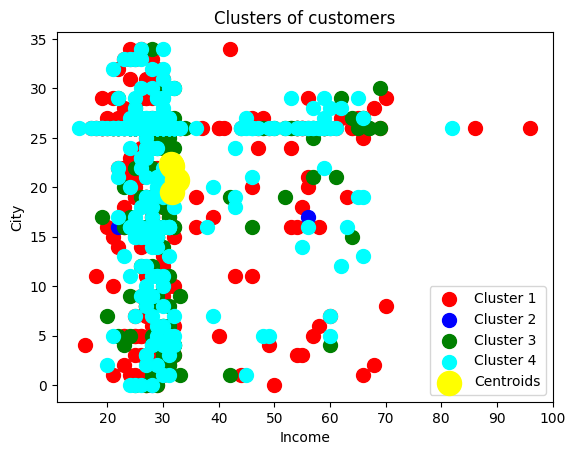

In [36]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Income')
plt.ylabel('City')
plt.legend()
plt.show()

# Mixture of distributions

In [76]:
k_range = range(2, 9)
nrep = 10  # Number of repetitions
best_gmm = None
lowest_bic = np.infty

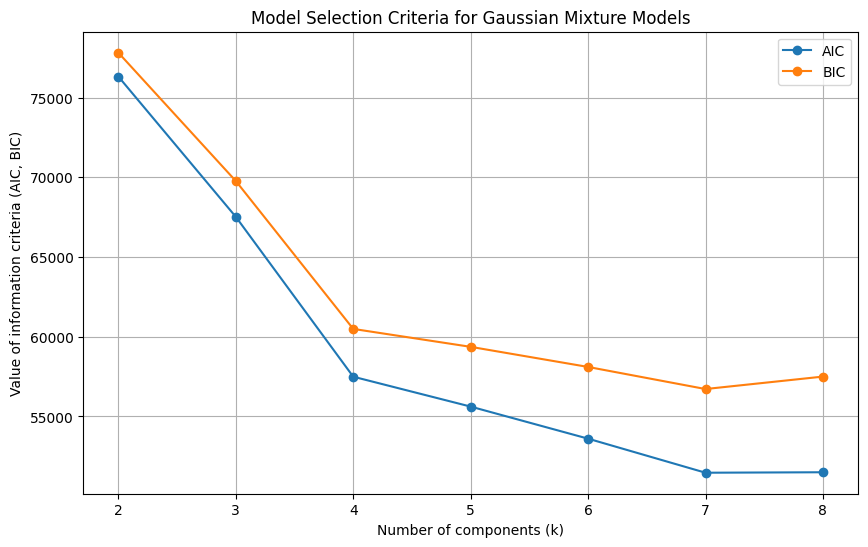

In [80]:
# Initialize dictionaries to store AIC, BIC, and ICL for each k
aic_values = {k: [] for k in k_range}
bic_values = {k: [] for k in k_range}

# Fit Gaussian Mixture Models with different number of components
for k in k_range:
    for _ in range(nrep):
        gmm = GaussianMixture(n_components=k, random_state=np.random.randint(0, 10000))
        gmm.fit(X)
        aic_values[k].append(gmm.aic(X))
        bic_values[k].append(gmm.bic(X))

# Calculate mean AIC and BIC for each k
mean_aic = [np.mean(aic_values[k]) for k in k_range]
mean_bic = [np.mean(bic_values[k]) for k in k_range]

# Plot the values
plt.figure(figsize=(10, 6))
plt.plot(k_range, mean_aic, label='AIC', marker='o')
plt.plot(k_range, mean_bic, label='BIC', marker='o')

plt.xlabel('Number of components (k)')
plt.ylabel('Value of information criteria (AIC, BIC)')
plt.title('Model Selection Criteria for Gaussian Mixture Models')
plt.legend()
plt.grid(True)
plt.show()

In [81]:
MD_m4 = gmm_models[4]


In [82]:
# Get the clusters from the Gaussian Mixture Model
mixture_clusters = MD_m4.predict(X)

mixture   0    1  2    3
kmeans                  
0        29  179  0  222
1         0    0  7    0
2        34   66  0   95
3        35  157  0  175


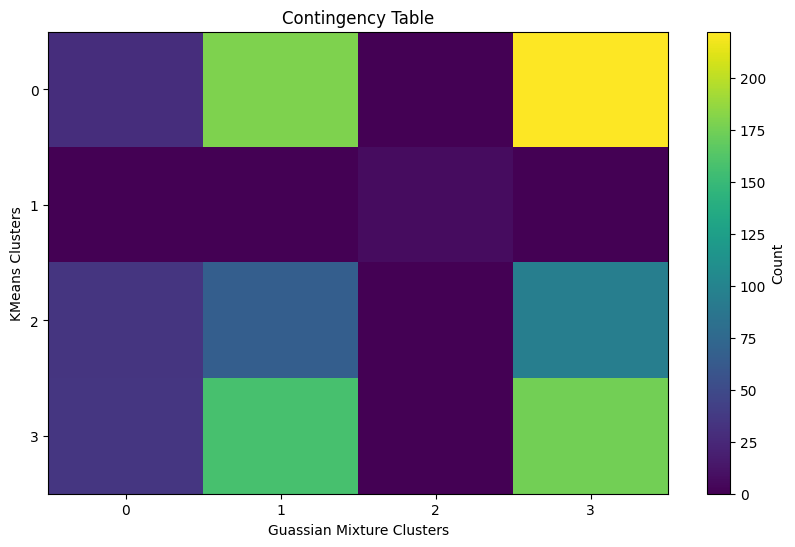

In [83]:

# Create a contingency table
contingency_table = pd.crosstab(y_kmeans, mixture_clusters, rownames=['kmeans'], colnames=['mixture'])

# Print the contingency table
print(contingency_table)

# If you want to visualize the contingency table
plt.figure(figsize=(10, 6))
plt.title('Contingency Table')
plt.xlabel('Guassian Mixture Clusters')
plt.ylabel('KMeans Clusters')
plt.imshow(contingency_table, cmap='viridis', aspect='auto')
plt.colorbar(label='Count')
plt.xticks(ticks=np.arange(4), labels=np.arange(4))
plt.yticks(ticks=np.arange(4), labels=np.arange(4))
plt.show()

In [84]:
# Compute the log-likelihood of the fitted model
log_likelihood = gmm.score(X) * X.shape[0]
print("Log-likelihood:", log_likelihood)

Log-likelihood: -24188.935660705556
